In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [69]:
data = pd.read_table('/Users/ChineseSamurai/Documents/git/Key_protocol', sep = ',')

In [70]:
data.columns

Index(['key', 'Protocol', 'freq', 'mean_length'], dtype='object')

In [71]:
data.head(5)

,key,Protocol,freq,mean_length
0,128.143.1.10_162.250.7.6,TCP,1,103.0
1,128.143.1.11_162.222.75.243,TCP,2,1432.0
2,128.143.1.11_162.222.75.243,TLSv1.2,1,599.0
3,128.143.1.119_23.21.240.237,TCP,1,60.0
4,128.143.1.120_74.125.141.105,TCP,3,60.0


In [72]:
test = data[['freq','mean_length']]

In [85]:

X_train = np.array(test.loc[0:len(test)*.75,])
X_test = np.array(test.loc[len(test)*.75+1:len(test),]) 


In [86]:
clf = IsolationForest(max_samples=100, random_state= 2)
clf.fit(X_train)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples=100, n_estimators=100, n_jobs=1, random_state=2,
        verbose=0)

In [100]:
score.sort_index(by = 0)

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,0
38,-0.261873
420,-0.241983
885,-0.239000
419,-0.238312
418,-0.238312
954,-0.238312
289,-0.231863
743,-0.229873
882,-0.229873
839,-0.228644


In [87]:
y_pred_test = clf.predict(X_test)
len(X_test)

1090

In [98]:
score = pd.DataFrame(clf.decision_function(X_test))# Average Anomaly scores
score
# 0.5 - score = newscore
# score = 0.5 - newscore

,0
0,0.117537
1,0.040059
2,0.049840
3,0.105552
4,0.048886
5,0.105552
6,0.006634
7,-0.008718
8,-0.000635
9,-0.070942


In [89]:
xx, yy = np.meshgrid(np.linspace(0, 100, 50), np.linspace(0,2000, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


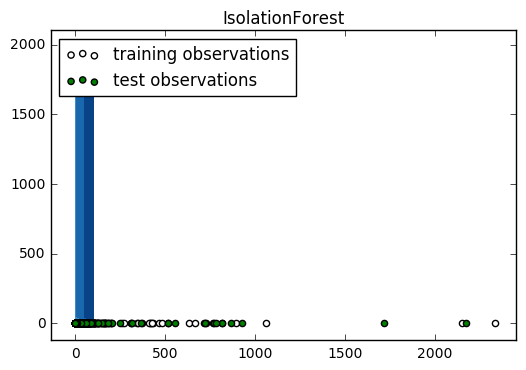

In [101]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
plt.axis('tight')
#plt.xlim((-1000, 2500))
#plt.ylim((0, 7))
plt.legend([b1, b2],
           ["training observations",
            "test observations"],
           loc="upper left")
plt.show()

In [50]:
# looks like the results are skewed. 
# look at the distribution of both columns
test.head(5)
# looks like mean_length has a rather scarce distribution at the end.
# try log transformation

,freq,mean_length,log_mean_len
0,1,103.0,2.012837
1,2,1432.0,3.155943
2,1,599.0,2.777427
3,1,60.0,1.778151
4,3,60.0,1.778151


In [81]:
import math
test['log_mean_len'] = test['mean_length'].apply(math.log10)

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [84]:
test.head(4)

,freq,log_mean_len
0,1,2.012837
1,2,3.155943
2,1,2.777427
3,1,1.778151


In [83]:
test =test.drop('mean_length',1)
#test= test.drop('l1og_mean_len',1)